In [2]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/sidda/OneDrive/Desktop/Tableau/Covid-19 World Vaccination Progress/archive/country_vaccinations.csv")

In [4]:
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,1/29/2021,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,1/30/2021,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Argentina,ARG,12/29/2020,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,12/30/2020,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,12/31/2020,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,Wales,NaN,1/26/2021,312944.0,312305.0,639.0,22797.0,19537.0,9.93,9.91,0.02,6197.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1841,Wales,NaN,1/27/2021,336745.0,336071.0,674.0,23801.0,20845.0,10.68,10.66,0.02,6611.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1842,Wales,NaN,1/28/2021,362970.0,362253.0,717.0,26225.0,21463.0,11.51,11.49,0.02,6807.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
1843,Wales,NaN,1/29/2021,378950.0,378200.0,750.0,15980.0,19705.0,12.02,12.00,0.02,6250.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [5]:
data.shape

(1845, 15)

In [6]:
data.isna().sum()

country                                   0
iso_code                                198
date                                      0
total_vaccinations                      613
people_vaccinated                       876
people_fully_vaccinated                1358
daily_vaccinations_raw                  837
daily_vaccinations                       70
total_vaccinations_per_hundred          613
people_vaccinated_per_hundred           876
people_fully_vaccinated_per_hundred    1358
daily_vaccinations_per_million           70
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [7]:
data = data.drop(data[data.total_vaccinations.isna()].index)

In [12]:
data.sum()

country                                AlgeriaAlgeriaArgentinaArgentinaArgentinaArgen...
date                                   1/29/20211/30/202112/29/202012/31/20201/4/2021...
total_vaccinations                                                           1.06822e+09
people_vaccinated                                                            8.18184e+08
people_fully_vaccinated                                                      1.01384e+08
daily_vaccinations_raw                                                       6.16456e+07
daily_vaccinations                                                           6.13454e+07
total_vaccinations_per_hundred                                                   4345.57
people_vaccinated_per_hundred                                                    3453.43
people_fully_vaccinated_per_hundred                                               379.89
daily_vaccinations_per_million                                               2.53799e+06
vaccines             

In [9]:
check_data = data.drop(data[data.people_vaccinated.isna()].index)

In [10]:
check_data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
24,Argentina,ARG,1/20/2021,247933.0,243539.0,4394.0,NaN,11586.0,0.55,0.54,0.01,256.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
25,Argentina,ARG,1/21/2021,265724.0,249372.0,16352.0,17791.0,11704.0,0.59,0.55,0.04,259.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
26,Argentina,ARG,1/22/2021,279602.0,254456.0,25146.0,13878.0,11263.0,0.62,0.56,0.06,249.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
27,Argentina,ARG,1/23/2021,288064.0,258876.0,29188.0,8462.0,11124.0,0.64,0.57,0.06,246.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
28,Argentina,ARG,1/24/2021,292023.0,260036.0,31987.0,3959.0,10342.0,0.65,0.58,0.07,229.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


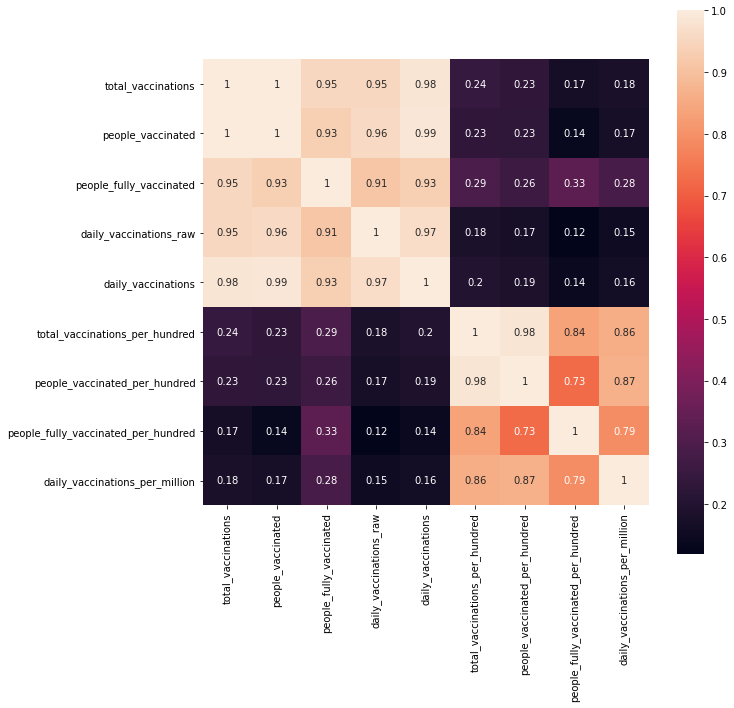

In [11]:
plt.subplots(figsize=(10, 10))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()

In [21]:
scipy.stats.mannwhitneyu(check_data.total_vaccinations, check_data.people_vaccinated)

MannwhitneyuResult(statistic=446469.0, pvalue=0.28872423362050614)

In [22]:
diff = check_data.total_vaccinations.mean() - check_data.people_vaccinated.mean()

In [23]:
diff_per_hundred = check_data.total_vaccinations_per_hundred.mean() - check_data.people_vaccinated_per_hundred.mean()

In [25]:
data.people_vaccinated = data.people_vaccinated.fillna(data.total_vaccinations - diff)

In [27]:
data.people_vaccinated_per_hundred = data.people_vaccinated_per_hundred.fillna(data.total_vaccinations_per_hundred - diff_per_hundred)

In [1]:
data.sum()

NameError: name 'data' is not defined

In [29]:
data.daily_vaccinations = data.daily_vaccinations.fillna(0)
data.daily_vaccinations_per_million = data.daily_vaccinations_per_million.fillna(0)

In [30]:
data.people_fully_vaccinated = data.people_fully_vaccinated.fillna(0)
data.people_fully_vaccinated_per_hundred = data.people_fully_vaccinated_per_hundred.fillna(0)

In [31]:
data.daily_vaccinations_raw = data.daily_vaccinations_raw.fillna(0)

In [33]:
data.isna().sum()

country                                 0
iso_code                               98
date                                    0
total_vaccinations                      0
people_vaccinated                       0
people_fully_vaccinated                 0
daily_vaccinations_raw                  0
daily_vaccinations                      0
total_vaccinations_per_hundred          0
people_vaccinated_per_hundred           0
people_fully_vaccinated_per_hundred     0
daily_vaccinations_per_million          0
vaccines                                0
source_name                             0
source_website                          0
dtype: int64

In [34]:
data[data.iso_code.isna()].country.unique()

array(['England', 'Northern Cyprus', 'Northern Ireland', 'Scotland',
       'Wales'], dtype=object)

In [35]:
data[data.country == 'England'] = data[data.country == 'England'].fillna('GB-ENG')
data[data.country == 'Northern Ireland'] == data[data.country == 'Northern Ireland'].fillna('GB-NIR')
data[data.country == 'Scotland'] = data[data.country == 'Scotland'].fillna('GB-SCT')
data[data.country == 'Wales'] = data[data.country == 'Wales'].fillna('GB-WLS')
data = data.fillna('NC')

In [36]:
data.isna().sum()

country                                0
iso_code                               0
date                                   0
total_vaccinations                     0
people_vaccinated                      0
people_fully_vaccinated                0
daily_vaccinations_raw                 0
daily_vaccinations                     0
total_vaccinations_per_hundred         0
people_vaccinated_per_hundred          0
people_fully_vaccinated_per_hundred    0
daily_vaccinations_per_million         0
vaccines                               0
source_name                            0
source_website                         0
dtype: int64

In [37]:
data.to_csv("clean_data.csv")